<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5440_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



100%|██████████| 10/10 [1:27:16<00:00, 523.64s/it]



Best Performing Hyperparameters:
start                          03/05/25-165656
end                            03/05/25-170720
duration                            623.936167
round_epochs                               100
loss                                  1.938953
accuracy                               0.39714
val_loss                              2.314122
val_accuracy                            0.3147
units                                      240
hidden_activations                        relu
activation                             softmax
loss                  categorical_crossentropy
optimizer                                 adam
batch_size                                2000
Name: 8, dtype: object

Best Training Accuracy: 39.71% (Rounded: 40%)
Point Deduction: 0 points
Total Execution Time: 5236.45 seconds


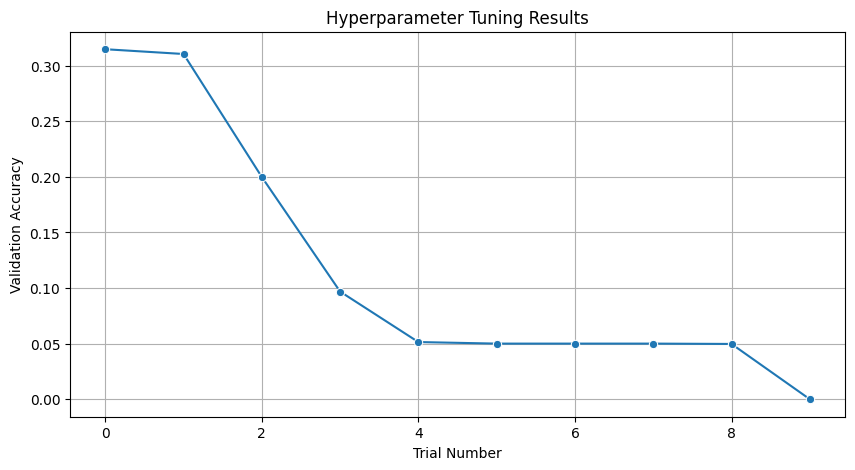

In [8]:
import talos
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import time
import io
import base64
import requests
from google.colab import drive
drive.mount("/content/drive")

# Load CIFAR-100 dataset
with open('/content/drive/My Drive/train', 'rb') as file:
    train_dict = pickle.load(file, encoding='bytes')

with open('/content/drive/My Drive/test', 'rb') as file:
    test_dict = pickle.load(file, encoding='bytes')

X_train = train_dict[b'data']
y_train = train_dict[b'coarse_labels']

X_test = test_dict[b'data']
y_test = test_dict[b'coarse_labels']

y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

# Define parameter dictionary for Talos
p = {
    'units': [120, 240],
    'hidden_activations': ['relu', 'sigmoid'],
    'activation': ['softmax', 'sigmoid'],
    'loss': ['mse', 'categorical_crossentropy'],
    'optimizer': ['adam', 'adagrad'],
    'batch_size': [1000, 2000]
}

# Define the model function for Talos
def my_model(X_train, y_train, X_val, y_val, params):
    model = Sequential()
    model.add(Dense(units=params['units'], activation=params['hidden_activations'], input_dim=X_train.shape[1]))

    for _ in range(4):  # Adding 4 hidden layers
        model.add(Dense(units=params['units'], activation=params['hidden_activations']))

    model.add(Dense(units=100, activation=params['activation']))  # Output layer

    model.compile(loss=params['loss'], optimizer=params['optimizer'], metrics=['accuracy'])

    out = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        batch_size=params['batch_size'], epochs=200, verbose=0)

    return out, model
csv_filename = "/connect/drive/My Drive/talos_output"

# Start Talos hyperparameter tuning
start_time = time.time()
t_object = talos.Scan(x=X_train, y=y_train, params=p, model=my_model, x_val=X_test, y_val=y_test, round_limit=10, experiment_name=csv_filename)

df = t_object.data

# Find the best performing hyperparameter set based on training accuracy
best_accuracy = df['accuracy'].max() * 100  # Convert to percentage
best_accuracy_rounded = round(best_accuracy)

# Calculate point deduction
deduction = max(0, 20 - best_accuracy_rounded)

# Find the best-performing model based on validation accuracy
best_model_idx = df['val_accuracy'].idxmax()  # Get the row index with the highest validation accuracy
best_params = df.iloc[best_model_idx]  # Extract best hyperparameters

# Print the best-performing hyperparameter set
print("\nBest Performing Hyperparameters:")
print(best_params)

# Display results
print(f"\nBest Training Accuracy: {best_accuracy:.2f}% (Rounded: {best_accuracy_rounded}%)")
print(f"Point Deduction: {deduction} points")
print(f"Total Execution Time: {time.time() - start_time:.2f} seconds")

# Sort by validation accuracy
df_sorted = df.sort_values(by="val_accuracy", ascending=False)

# Plot validation accuracy for each trial
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(df_sorted)), y=df_sorted["val_accuracy"], marker="o")

plt.xlabel("Trial Number")
plt.ylabel("Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.grid()
# Save the figure to Google Drive
plt.savefig("/content/drive/My Drive/hyperparameter_tuning_plot.png", dpi=300)
plt.show()

In [2]:
!pip install talos

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: 